In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [90]:
# local dos dados e modifica o diretorio
! git clone https://github.com/ucfilho/ANN
%cd ANN
! ls
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)

Cloning into 'ANN'...
remote: Counting objects: 51, done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 14), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.
/root/ANN/ANN/ANN/ANN/ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
ANN_Hydrofoil_set_12_2018.ipynb
Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [92]:
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original --> sempre normatizar os dados para nao saturar a rede
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [95]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print("==================================================================")
print(DAT_OLD.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605
   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [96]:
# separa os dados em treino e teste, apenas os normatizados, estes serao utilizados no treinamento e teste da rede neural
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao? sim, caso a amostragem fosse grande o suficiente
test=DAT.drop(train.index) # nao utiliza os indices utilizados anteriormente --> drop
print(train.head())
print("==================================================================")
print(train.shape[0]) # mostra o numero de linhas da matrix
print("==================================================================")
print(test.head())
print("==================================================================")
print(test.shape[0])

    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
53   1.000000  0.382887    0.118750  0.732446  0.362262 -0.226448
11  -1.000000  0.210026    0.332812  0.151034  0.786861 -0.193631
55   1.000000  0.688850    0.437500  0.839870  0.171315  0.213861
6   -1.000000 -0.654278   -0.644271 -1.000000 -0.179187 -0.938508
26  -0.333333  0.555748    0.442708  0.642230  0.409505  0.122245
47
    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
5   -1.000000 -0.827139   -0.944948 -0.910184 -0.453078 -0.995242
9   -1.000000 -0.135696   -0.018750 -0.168314  0.796046 -0.575951
10  -1.000000  0.037165    0.192708  0.011999  0.745693 -0.381482
15  -1.000000  0.728608    0.626042  0.702954  0.911268  0.405395
20  -0.333333 -0.481417   -0.273437 -0.673691  0.730444 -0.811609
12


In [97]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]
print(x_test.head())
print("==================================================================")
print(x_train.head())
print("==================================================================")
print(X_OLD.head())

    Hydrofoil    Froude
5   -1.000000 -0.827139
9   -1.000000 -0.135696
10  -1.000000  0.037165
15  -1.000000  0.728608
20  -0.333333 -0.481417
    Hydrofoil    Froude
53   1.000000  0.382887
11  -1.000000  0.210026
55   1.000000  0.688850
6   -1.000000 -0.654278
26  -0.333333  0.555748
   Hydrofoil    Froude
0          1  0.000000
1          1  0.103733
2          1  0.124480
3          1  0.165973
4          1  0.186719


In [98]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4,5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print("==================================================================")
print(y_train.head())
print("==================================================================")
print(Y_OLD.head())

    Resistence   Sinkage      Trim     Power
5    -0.944948 -0.910184 -0.453078 -0.995242
9    -0.018750 -0.168314  0.796046 -0.575951
10    0.192708  0.011999  0.745693 -0.381482
15    0.626042  0.702954  0.911268  0.405395
20   -0.273437 -0.673691  0.730444 -0.811609
    Resistence   Sinkage      Trim     Power
53    0.118750  0.732446  0.362262 -0.226448
11    0.332812  0.151034  0.786861 -0.193631
55    0.437500  0.839870  0.171315  0.213861
6    -0.644271 -1.000000 -0.179187 -0.938508
26    0.442708  0.642230  0.409505  0.122245
   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [0]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [100]:
# treina a rede neural
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [102]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names # coloca o nome nas colunas novamente utilizando os nomes das colunas originais
y_calc_test.columns = col_names
print(y_calc_train.head())

   Resistence   Sinkage      Trim     Power
0    0.047133  0.755528  0.396475 -0.264529
1    0.258198  0.276657  0.829520 -0.238928
2    0.403362  0.864852  0.258702  0.193245
3   -0.672071 -0.913669  0.067275 -0.970859
4    0.453018  0.613138  0.543912  0.124196


In [103]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test.head())
print("==================================================================")
print(y_calc_train.head())

   Resistence    Sinkage      Trim        Power
0   17.971668  -2.982423  1.416865    -9.864141
1  196.910582  43.448849  4.527285   731.103782
2  217.083767  55.727885  4.539196   971.882506
3  314.626654  84.036569  4.582602  2380.771475
4  125.677505   6.319587  3.775407   257.748295
   Resistence    Sinkage      Trim        Power
0  197.162181  91.101813  3.495643  1195.180009
1  236.903137  64.478037  4.579639  1236.782271
2  264.235780  97.179878  3.150771  1939.087280
3   61.744924  -1.700378  2.671594    47.356189
4  273.585357  83.185363  3.864707  1826.878779


In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [111]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Resistence'].copy()
resist_obs_train=train['Resistence'].copy()
print(resist_calc_train.head())

0    197.162181
1    236.903137
2    264.235780
3     61.744924
4    273.585357
Name: Resistence, dtype: float64


In [106]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=test['Resistence'].copy()
print(resist_calc_test.head())

0     17.971668
1    196.910582
2    217.083767
3    314.626654
4    125.677505
Name: Resistence, dtype: float64


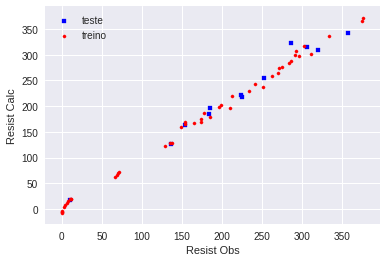

In [107]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111) # para nao apagar o grafico anterior

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [109]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 179.2674092326627
R^2 teste= 0.9783903114017386


In [110]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 54.10836577516647
R^2 treino= 0.9959440828241805
